In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("household_power_consumption.csv")

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [4]:
# combining the date and time column
data['Datetime'] = pd.to_datetime(data['Date'] + " " + data['Time'], dayfirst=True)
data=data.set_index('Datetime')

In [5]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [6]:
# converting variables to float
float_col = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2', 'Sub_metering_3']

In [7]:
for c in float_col:
    data[c] = pd.to_numeric(data[c], errors='coerce')

In [8]:
df = data.copy()

In [9]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
# Drop date and time columns
df = df.drop(columns = ['Date','Time','Global_reactive_power', "Voltage",'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2006-12-16 17:24:00 to 2010-11-26 20:11:00
Data columns (total 1 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Global_active_power  1044506 non-null  float64
dtypes: float64(1)
memory usage: 16.0 MB


In [12]:
# Check for missing values
df.isna().sum()

Global_active_power    4069
dtype: int64

In [13]:
# Filling missing values with interpolation
df = df.fillna(method='ffill')

In [14]:
#df=df.set_index('Datetime')

In [15]:
df.head()

,Global_active_power
Datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [16]:
df.isnull().sum()

Global_active_power    0
dtype: int64

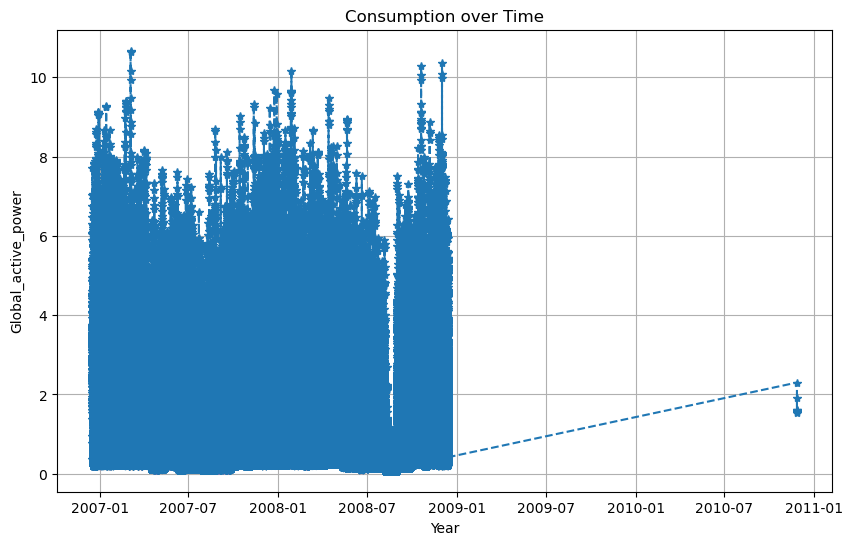

In [17]:
plt.figure(figsize=(10,6))
plt.plot(data.index, df['Global_active_power'], linestyle="--", marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.title('Consumption over Time')
plt.show()

In [18]:
df.head()

,Global_active_power
Datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
# Downsample to hourly to make decomposition manageable
df = df.resample('H').mean()

In [21]:
# importing model

In [22]:
df.isnull().sum()

Global_active_power    17110
dtype: int64

In [23]:
# Filling missing values with interpolation
df = df.fillna(method='ffill')

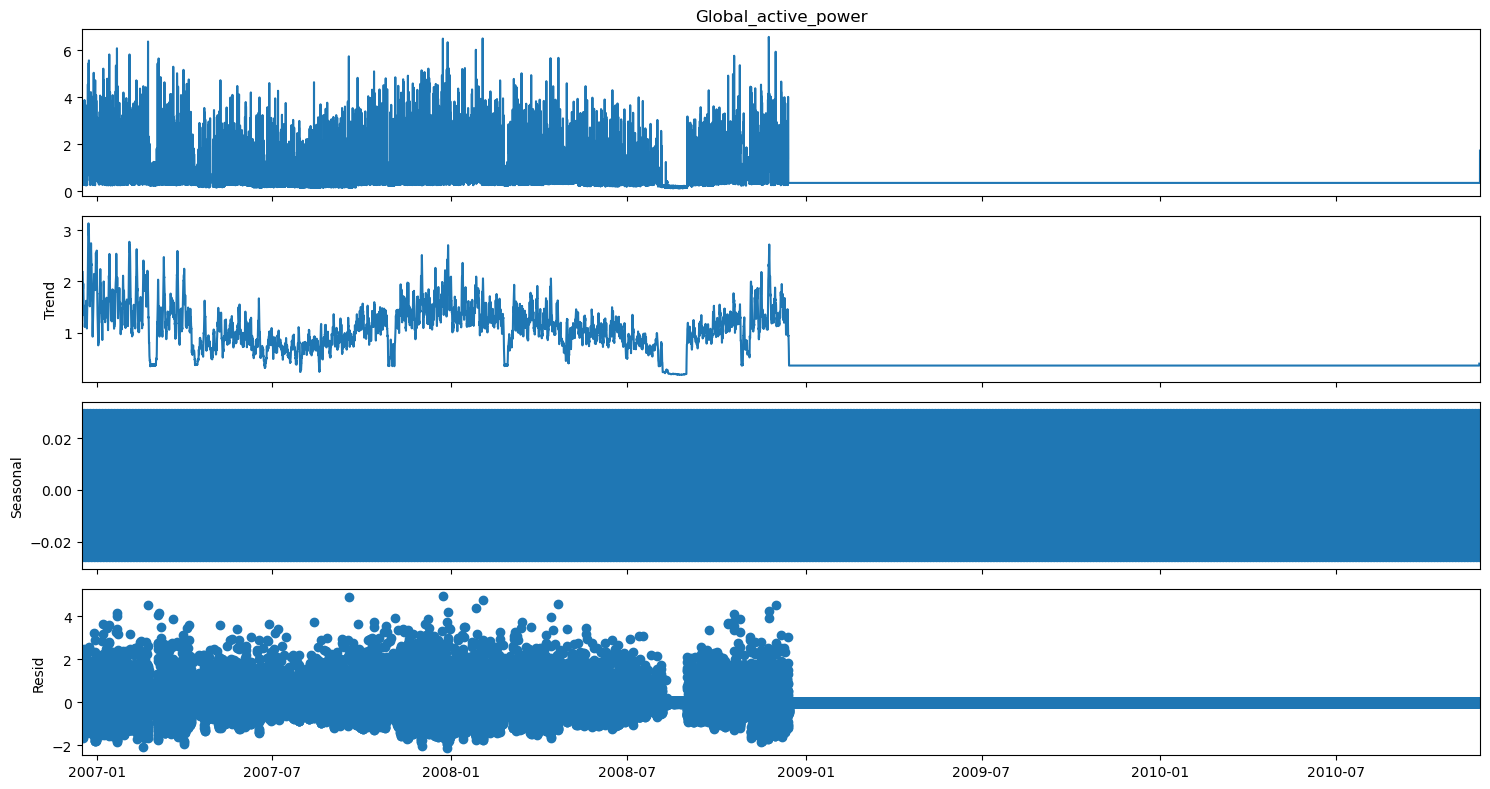

In [24]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', period=37)
decompose_series.plot()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Global_active_power'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p_value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistics: -9.052847010566742
p_value: 4.787977145490063e-15
No. of lags used: 50
No. of observations used: 34537
Critical Values:
   1%: -3.4305393559398922
   5%: -2.8616236906108443
   10%: -2.566814545887977


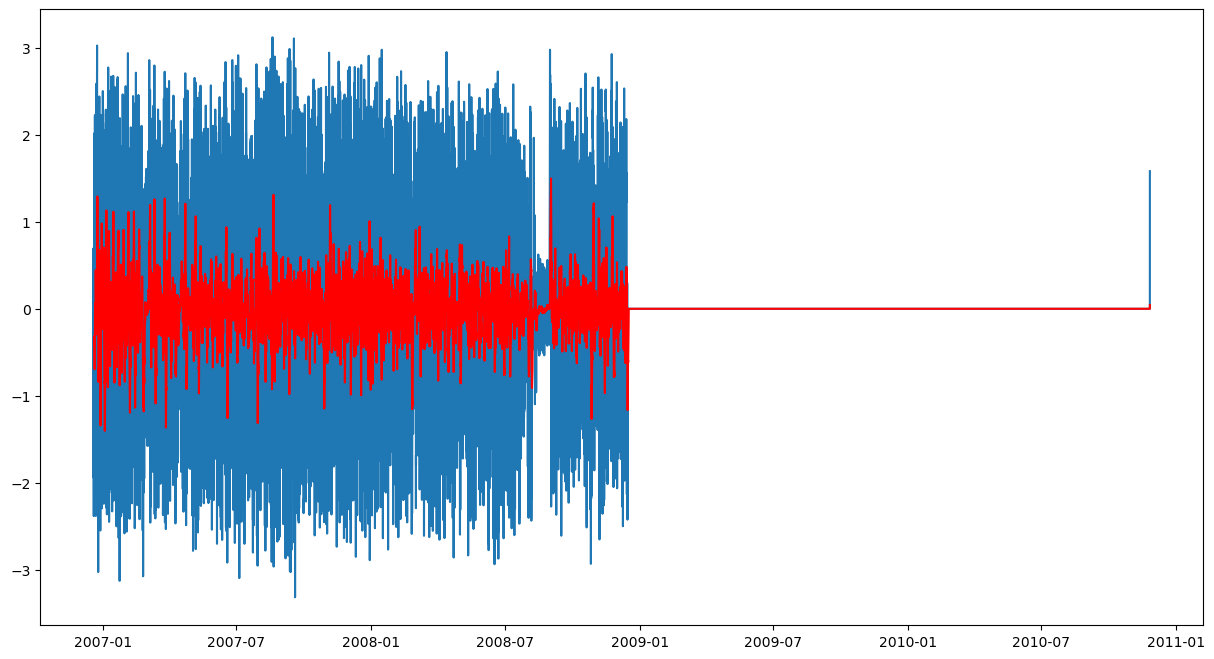

In [26]:
# Convert time series to stationary by emoving trend and seasonality
# Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=37)
plt.plot(df_diff.index, df_diff['Global_active_power'], "-")
plt.plot(df_diff.rolling(37).mean(), color='red')

In [27]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [28]:
def print_and_plot_acf(series):
    print(sm.tsa.stattools.acf(series, nlags=16))
    sm.graphics.tsa.plot_acf(series, lags=16)
    plt.show()
    
def print_and_plot_pacf(series):
    print(sm.tsa.stattools.acf(series, nlags=16))
    sm.graphics.tsa.plot_pacf(series, lags=16)
    plt.show()

[1.         0.7901093  0.60312841 0.46476178 0.36143155 0.2990598
 0.2649626  0.24709536 0.26238504 0.30356367 0.36154382 0.41088063
 0.43063745 0.41115054 0.36331045 0.30330358 0.25631446]


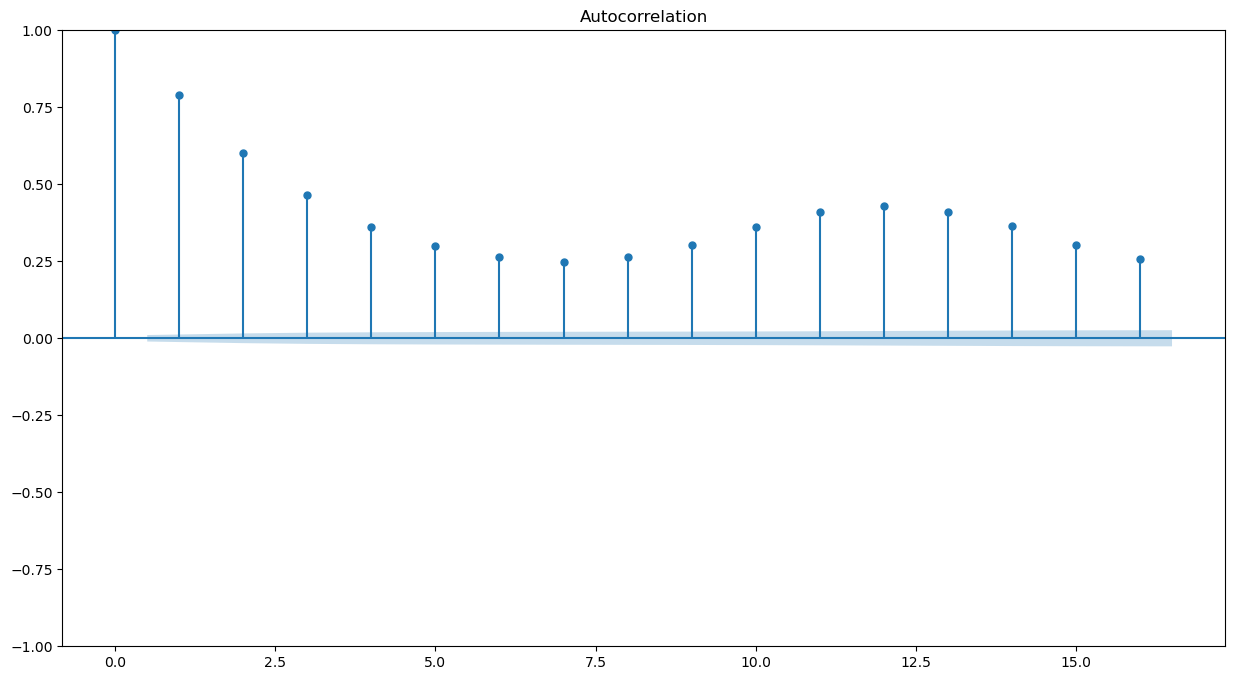

In [29]:
print_and_plot_acf(df['Global_active_power'])

[1.         0.7901093  0.60312841 0.46476178 0.36143155 0.2990598
 0.2649626  0.24709536 0.26238504 0.30356367 0.36154382 0.41088063
 0.43063745 0.41115054 0.36331045 0.30330358 0.25631446]


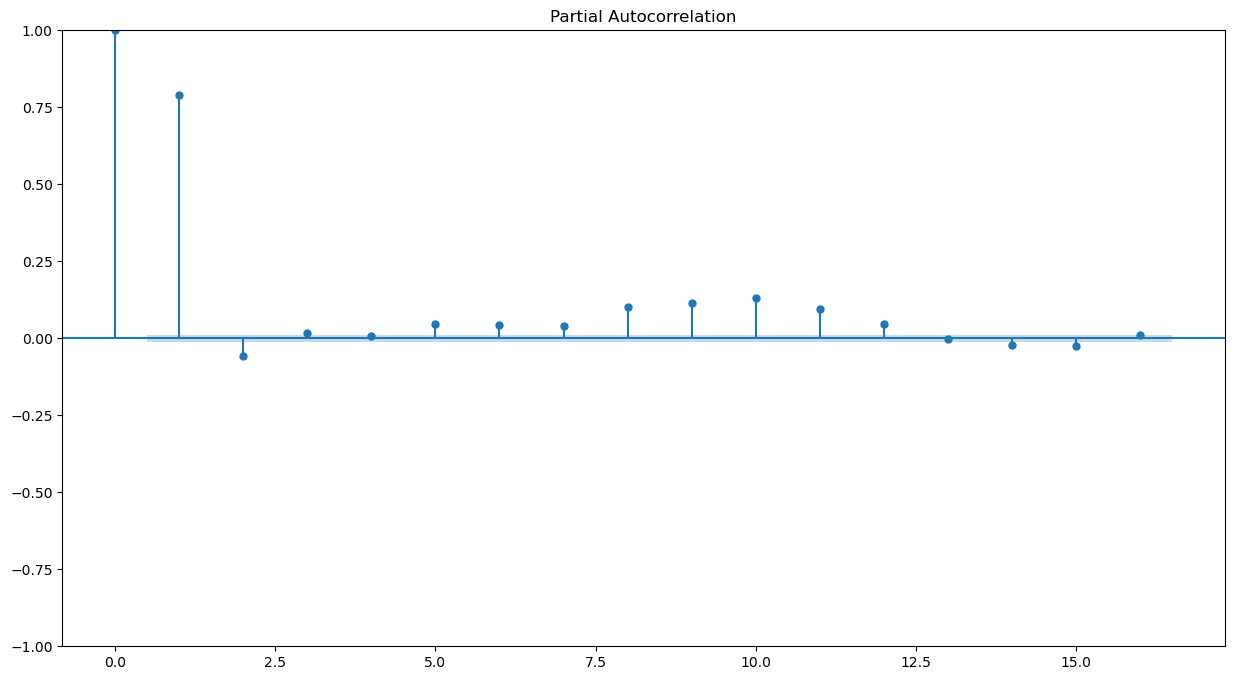

In [30]:
print_and_plot_pacf(df['Global_active_power'])

In [31]:
df_diff

,Global_active_power
Datetime,
2006-12-16 17:00:00,NaN
2006-12-16 18:00:00,NaN
2006-12-16 19:00:00,NaN
2006-12-16 20:00:00,NaN
2006-12-16 21:00:00,NaN
...,...
2010-11-26 16:00:00,0.000000
2010-11-26 17:00:00,0.000000
2010-11-26 18:00:00,0.000000


In [32]:
df_diff.isnull().sum()

Global_active_power    37
dtype: int64

In [33]:
df_diff = df_diff.dropna()

In [34]:
df_diff.isnull().sum()

Global_active_power    0
dtype: int64

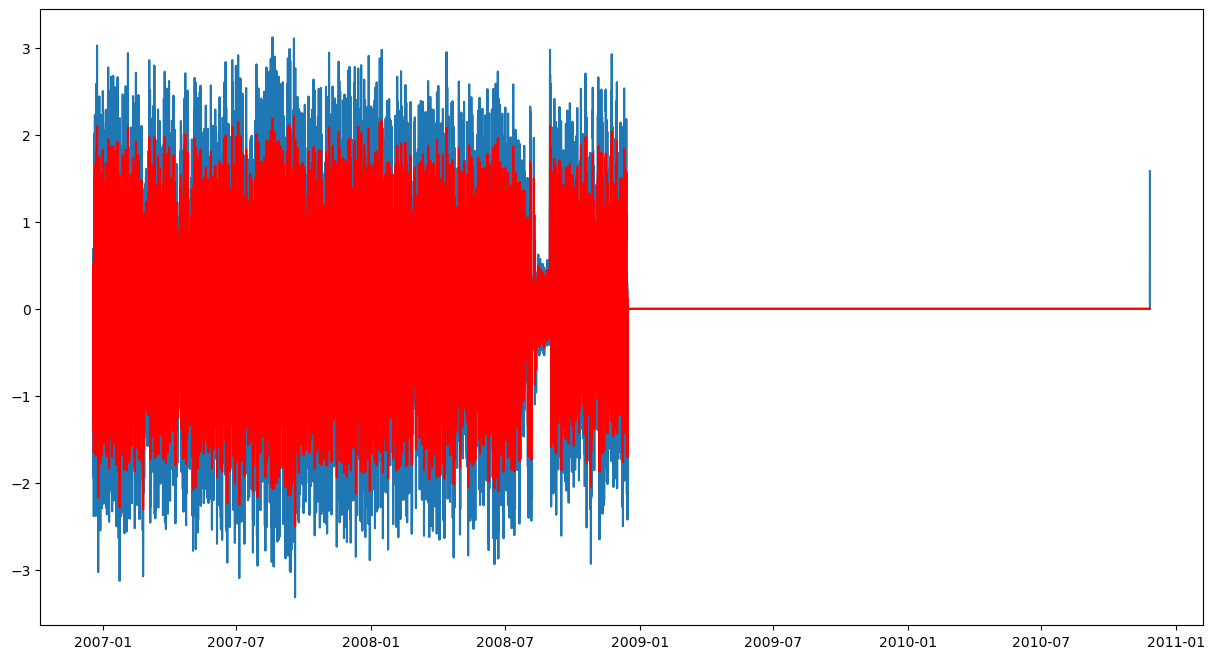

In [35]:
from statsmodels.tsa.arima.model import ARIMA
# (p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

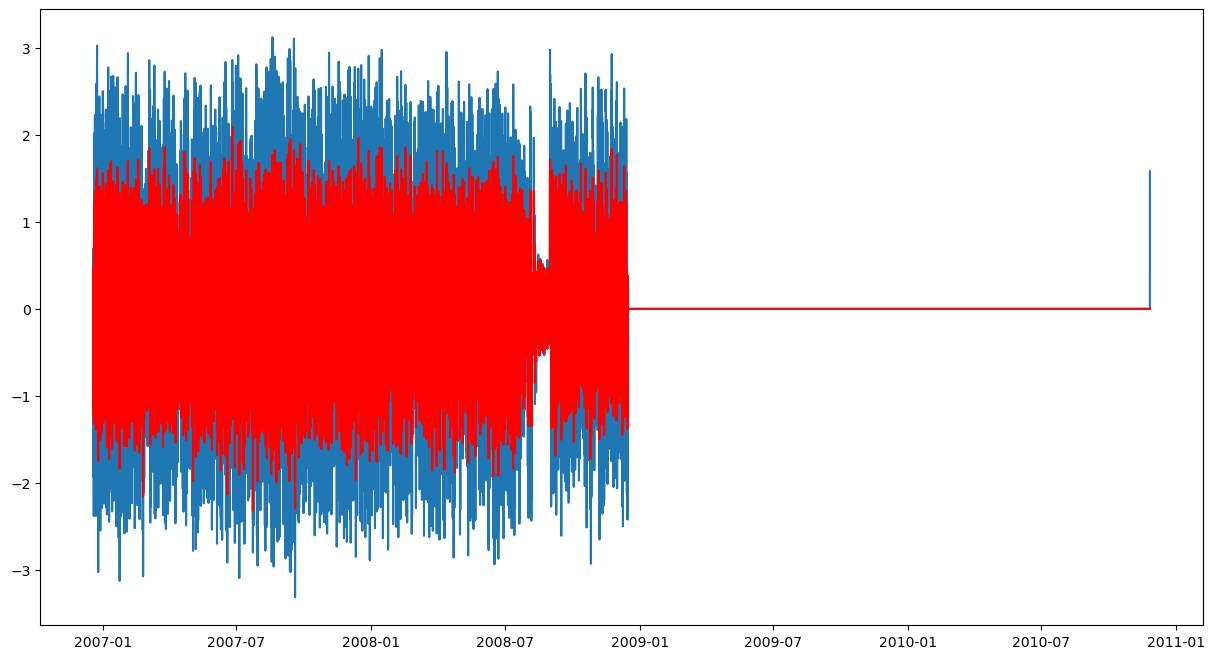

In [36]:
MA_model = ARIMA(df_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

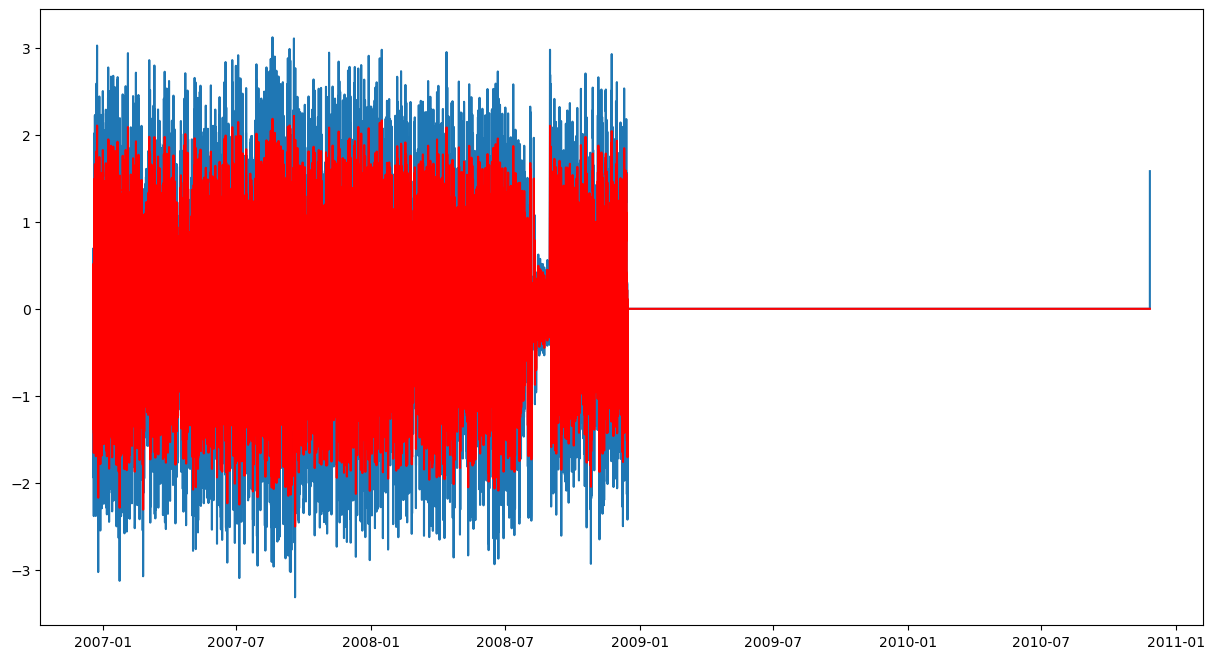

In [37]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')

In [38]:
from prophet import Prophet

In [39]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2006-12-16 17:24:00 to 2010-11-26 20:11:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  float64
 7   Sub_metering_2         1044506 non-null  float64
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7), object(2)
memory usage: 80.0+ MB


In [41]:
df = data

In [42]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [43]:
# Drop date and time columns
df = df.drop(columns = ['Date','Time','Global_reactive_power', "Voltage",'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

In [44]:
df.head()

,Global_active_power
Datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [45]:
# aggregate the data to a daily sum for "Global_active_power"
df = df['Global_active_power'].resample('D').sum().reset_index()

In [46]:
df.columns = ['ds', 'y']

In [47]:
# splitting the test data to the last 300 days and the train data to the first (-300) days
train = df[:-300]
test = df[-300:]

In [48]:
print(train.head())

          ds         y
0 2006-12-16  1209.176
1 2006-12-17  3390.460
2 2006-12-18  2203.826
3 2006-12-19  1666.194
4 2006-12-20  2225.748


In [49]:
print(test.head())

             ds    y
1142 2010-01-31  0.0
1143 2010-02-01  0.0
1144 2010-02-02  0.0
1145 2010-02-03  0.0
1146 2010-02-04  0.0


In [50]:
# Initialize model
model = Prophet()

In [51]:
# fit the model
model.fit(train)

04:24:53 - cmdstanpy - INFO - Chain [1] start processing
04:24:53 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
# make a dataframe for future dates (include the test period)
future = model.make_future_dataframe(periods=300)

In [53]:
# Predict
forecast = model.predict(future)

In [54]:
# Extract the forecasted values for the test period
forecast_test = forecast[-300:][['ds','yhat']]

In [55]:
# Merge the test set with the forecasted values
test = test.set_index('ds')
forecast_test = forecast_test.set_index('ds')
results = test.merge(forecast_test, left_index=True, right_index=True)

In [56]:
results

,y,yhat
ds,,
2010-01-31,0.000,-83.825905
2010-02-01,0.000,-339.000218
2010-02-02,0.000,-244.248922
2010-02-03,0.000,-276.778791
2010-02-04,0.000,-371.548699
...,...,...
2010-11-22,0.000,-334.263277
2010-11-23,0.000,-225.148828
2010-11-24,0.000,-245.467503


In [161]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [58]:
mse = mean_squared_error(results['y'], results['yhat'])

In [59]:
print(f'Mean Squared Error:{mse}')

Mean Squared Error:696182.1267343656


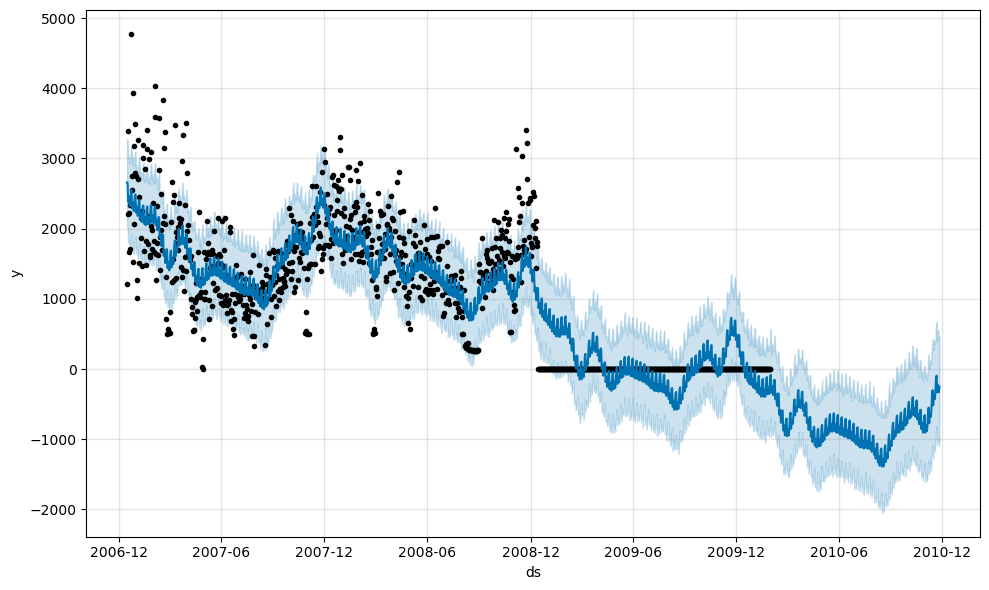

In [60]:
model.plot(forecast);

### Multivariate model

In [126]:
# load dataset
data = pd.read_csv("household_power_consumption.csv")

In [127]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [128]:
# Join the date and time column then convert to datetime
data['Datetime'] = pd.to_datetime(data['Date'] + " " + data['Time'], dayfirst=True)

In [129]:
# drop date and time column
data.drop(columns = ['Date','Time'], inplace=True)

In [130]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0,1,17.0,2006-12-16 17:24:00
1,5.36,0.436,233.63,23,0,1,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23,0,2,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23,0,1,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0,1,17.0,2006-12-16 17:28:00


In [131]:
# converting variables to float
float_col = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2', 
             'Sub_metering_3']

In [132]:
for c in float_col:
    data[c] = pd.to_numeric(data[c], errors='coerce')

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Global_active_power    1044506 non-null  float64       
 1   Global_reactive_power  1044506 non-null  float64       
 2   Voltage                1044506 non-null  float64       
 3   Global_intensity       1044506 non-null  float64       
 4   Sub_metering_1         1044506 non-null  float64       
 5   Sub_metering_2         1044506 non-null  float64       
 6   Sub_metering_3         1044506 non-null  float64       
 7   Datetime               1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 64.0 MB


In [134]:
# rename columns
data.rename(columns={'Datetime':'ds', 'Global_active_power':'y', 'Global_reactive_power':'add1', 'Voltage':'add2',
                    'Global_intensity':'add3', 'Sub_metering_1':'add4', 'Sub_metering_2':'add5','Sub_metering_3':'add6'},
           inplace=True)

In [135]:
data.head()

,y,add1,add2,add3,add4,add5,add6,ds
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [136]:
# check for missing values
data.isnull().sum()

y       4069
add1    4069
add2    4069
add3    4069
add4    4069
add5    4069
add6    4069
ds         0
dtype: int64

In [137]:
# use forward fill to handle missing data
data = data.fillna(method='ffill')

In [138]:
data.isnull().sum()

y       0
add1    0
add2    0
add3    0
add4    0
add5    0
add6    0
ds      0
dtype: int64

In [139]:
# sort data by date
data = data.sort_values('ds')

In [140]:
# split the data into train and test set
train = data.iloc[:-300]
test = data.iloc[-300:]

In [141]:
# import model
from prophet import Prophet

In [142]:
# initialize model
model = Prophet()

In [143]:
# add regressors

In [144]:
regressors = ['add1','add2','add3','add4','add5','add6']
for regressor in regressors:
    model.add_regressor(regressor)

In [145]:
# fit the model with the training data
model.fit(train)

05:13:45 - cmdstanpy - INFO - Chain [1] start processing
05:22:07 - cmdstanpy - INFO - Chain [1] done processing


In [146]:
# prepare the future dataframe including the test period
future = model.make_future_dataframe(periods=300)

In [157]:
# add the regressors to the future dataframe
future = future.merge(test[['ds'] + regressors], on='ds', how='right')   #position of 'ds' on the table/column

In [158]:
# predict using the model
forecast = model.predict(future)

In [159]:
# Extract the forecasted values for the test period
predicted = forecast.iloc[-300:]['yhat'].values

In [160]:
# actual values from the test set
actual = test['y'].values

In [163]:
# Evaluate the model
mae = mean_absolute_error(actual, predicted)
rmse = mean_squared_error(actual, predicted, squared=False)

In [164]:
# print the evaluation metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 0.029175933560712443
RMSE: 0.04378033154820651


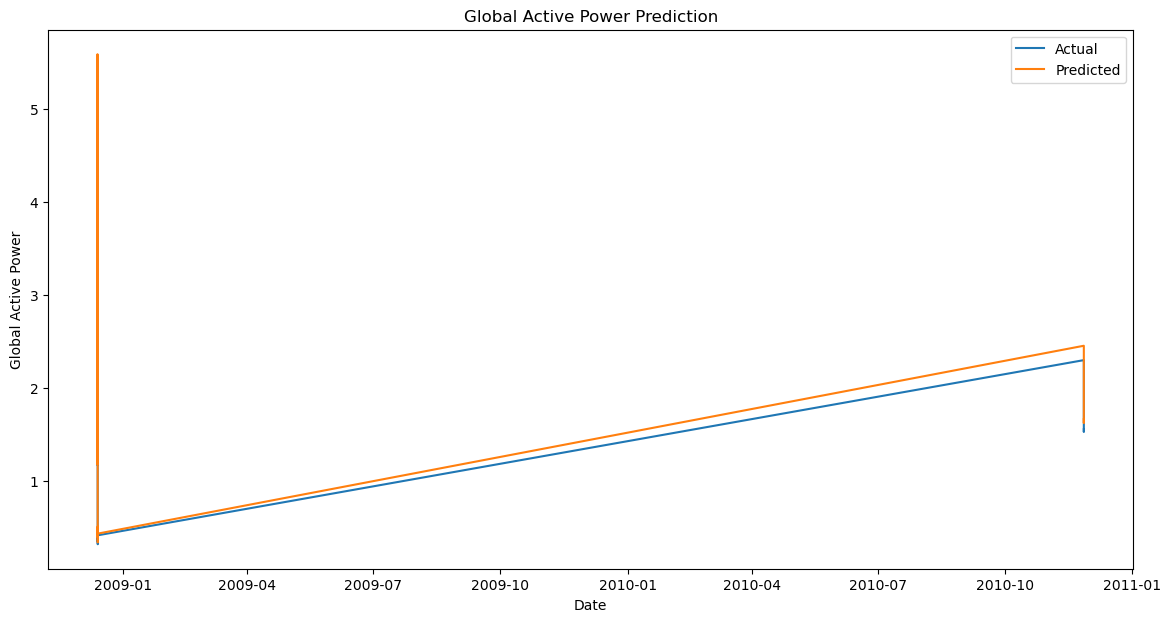

In [169]:
# plot the prediction
plt.figure(figsize=(14,7))
plt.plot(test['ds'], actual, label='Actual')
plt.plot(test['ds'], predicted, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Global Active Power Prediction')
plt.legend()
plt.show()